In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [13]:
data = pd.read_csv("database.csv")
print(data.head())
print(data.describe())
print(data.sample())

         Date      Time  Latitude  Longitude        Type  Depth  Depth Error  \
0  01/02/1965  13:44:18    19.246    145.616  Earthquake  131.6          NaN   
1  01/04/1965  11:29:49     1.863    127.352  Earthquake   80.0          NaN   
2  01/05/1965  18:05:58   -20.579   -173.972  Earthquake   20.0          NaN   
3  01/08/1965  18:49:43   -59.076    -23.557  Earthquake   15.0          NaN   
4  01/09/1965  13:32:50    11.938    126.427  Earthquake   15.0          NaN   

   Depth Seismic Stations  Magnitude Magnitude Type  ...  \
0                     NaN        6.0             MW  ...   
1                     NaN        5.8             MW  ...   
2                     NaN        6.2             MW  ...   
3                     NaN        5.8             MW  ...   
4                     NaN        5.8             MW  ...   

   Magnitude Seismic Stations  Azimuthal Gap  Horizontal Distance  \
0                         NaN            NaN                  NaN   
1                   

In [3]:
data.shape

(23412, 21)

In [4]:
import datetime as dt 

In [5]:
hozir = dt.datetime.now()

In [6]:
type(hozir)

datetime.datetime

In [7]:
print(hozir)

2024-01-04 08:53:50.004946


In [8]:
hozir.hour

8

In [9]:
hozir.minute

53

In [10]:
hozir.weekday()

3

In [11]:
hozir.month

1

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

# %m - oy, %d - kun, Y - yil agar 4ta son bilan yozilgan bulsa
buni bilish uchun python strftime saytiga kirib bular haqida malumot olsa buladi

In [17]:
pd.to_datetime(data["Date"], format="%m/%d/%Y")

ValueError: time data '1975-02-23T02:58:41.000Z' does not match format '%m/%d/%Y' (match)

In [18]:
data["Date"].str.len()

0        10
1        10
2        10
3        10
4        10
         ..
23407    10
23408    10
23409    10
23410    10
23411    10
Name: Date, Length: 23412, dtype: int64

In [19]:
data["Date"].str.len().value_counts()


10    23409
24        3
Name: Date, dtype: int64

In [25]:
data[data["Date"].str.len()==24]

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status


In [30]:
data.loc[20650, 'Date'] = "03/13/2011"

In [36]:
data['datetime'] = pd.to_datetime(data["Date"], format="%m/%d/%Y")

In [37]:
data.head()

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status,datetime
0,01/02/1965,13:44:18,19.246,145.616,Earthquake,131.6,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-02
1,01/04/1965,11:29:49,1.863,127.352,Earthquake,80.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-04
2,01/05/1965,18:05:58,-20.579,-173.972,Earthquake,20.0,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-05
3,01/08/1965,18:49:43,-59.076,-23.557,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-08
4,01/09/1965,13:32:50,11.938,126.427,Earthquake,15.0,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic,1965-01-09


In [39]:
data.at[0, 'datetime'].month.value_counts()

AttributeError: 'int' object has no attribute 'value_counts'

(array([2., 1., 1., 0., 2., 3., 2., 0., 0., 1.]),
 array([1824., 1853., 1882., 1911., 1940., 1969., 1998., 2027., 2056.,
        2085., 2114.]),
 <BarContainer object of 10 artists>)

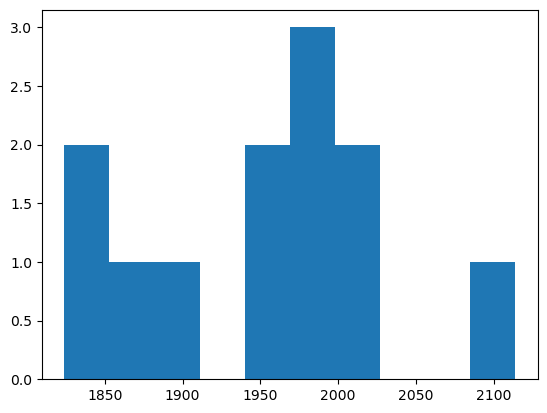

In [47]:
plt.hist(data.datetime.dt.month.value_counts())